# U.S. Senate 1976–2018 Dataset

Here we'll introduce concepts with examples using a U.S. Senate Elections dataset.

Examples:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = 10, 6
plt.rcParams["figure.dpi"] = 150

In [5]:
url = "https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/PEJ5QU/XXQCIK"
df = pd.read_csv(url, delimiter="\t")

In [6]:
df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
0,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Sam Steiger,republican,False,total,321236,741210,False,20171011.0
1,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Wm. Mathews Feighan,independent,False,total,1565,741210,False,20171011.0
2,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Dennis DeConcini,democrat,False,total,400334,741210,False,20171011.0
3,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Allan Norwitz,libertarian,False,total,7310,741210,False,20171011.0
4,1976,Arizona,AZ,4,86,61,US Senate,statewide,gen,False,Bob Field,independent,False,total,10765,741210,False,20171011.0


In [25]:
df.count()

year              3421
state             3421
state_po          3421
state_fips        3421
state_cen         3421
state_ic          3421
office            3421
district          3421
stage             3421
special           3421
candidate         3011
party             2858
writein           3421
mode              3421
candidatevotes    3421
totalvotes        3421
unofficial        3421
version           3420
dtype: int64

In [64]:
df.office.value_counts()

US Senate    3421
Name: office, dtype: int64

In [115]:
df.party.value_counts().head(10)

republican           756
democrat             748
libertarian          341
independent          256
green                 81
socialist workers     65
natural law           45
constitution          41
reform                36
none                  27
Name: party, dtype: int64

In [116]:
df.describe()

,year,state_fips,state_cen,state_ic,candidatevotes,totalvotes,version
count,3421.000000,3421.000000,3421.000000,3421.000000,3.421000e+03,3.421000e+03,3.420000e+03
mean,1998.862321,29.037708,52.910552,38.989769,4.052304e+05,2.179958e+06,2.017186e+07
std,12.669946,15.430661,26.035517,22.740840,7.722098e+05,2.114724e+06,3.936505e+03
min,1976.000000,1.000000,11.000000,1.000000,1.000000e+00,1.000000e+00,2.017101e+07
25%,1988.000000,17.000000,33.000000,21.000000,4.745000e+03,6.407020e+05,2.017101e+07
50%,2000.000000,29.000000,54.000000,41.000000,5.738200e+04,1.541036e+06,2.017101e+07
75%,2010.000000,41.000000,74.000000,56.000000,4.766040e+05,2.802641e+06,2.017101e+07
max,2018.000000,56.000000,95.000000,82.000000,7.864624e+06,1.257851e+07,2.019011e+07


### party popularity over time

/home/gvacaliuc/.virtualenvs/deep/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


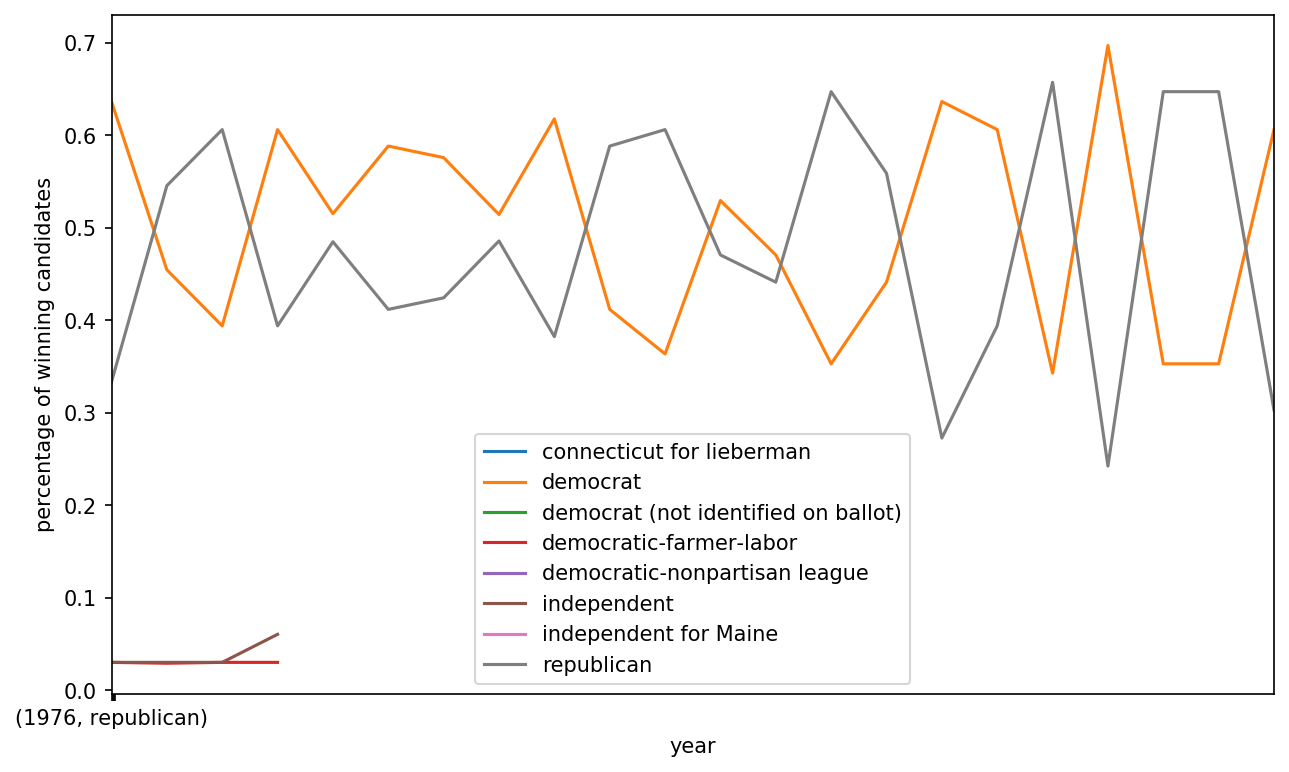

In [114]:
mostvotes = df.groupby(["year", "state"]).candidatevotes.idxmax()

# candidates that had the most votes in their election
most_df = df.iloc[mostvotes.values]

# get % of parties which had most votes per year
parties = most_df.groupby("year").party.value_counts(normalize=True)

# iterate through the parties and plot a line 
gb = parties.groupby("party")
for group in gb.groups:
    gb.get_group(group).plot.line(label=group)
    
plt.xlabel("year")
plt.ylabel("percentage of winning candidates")
plt.legend()

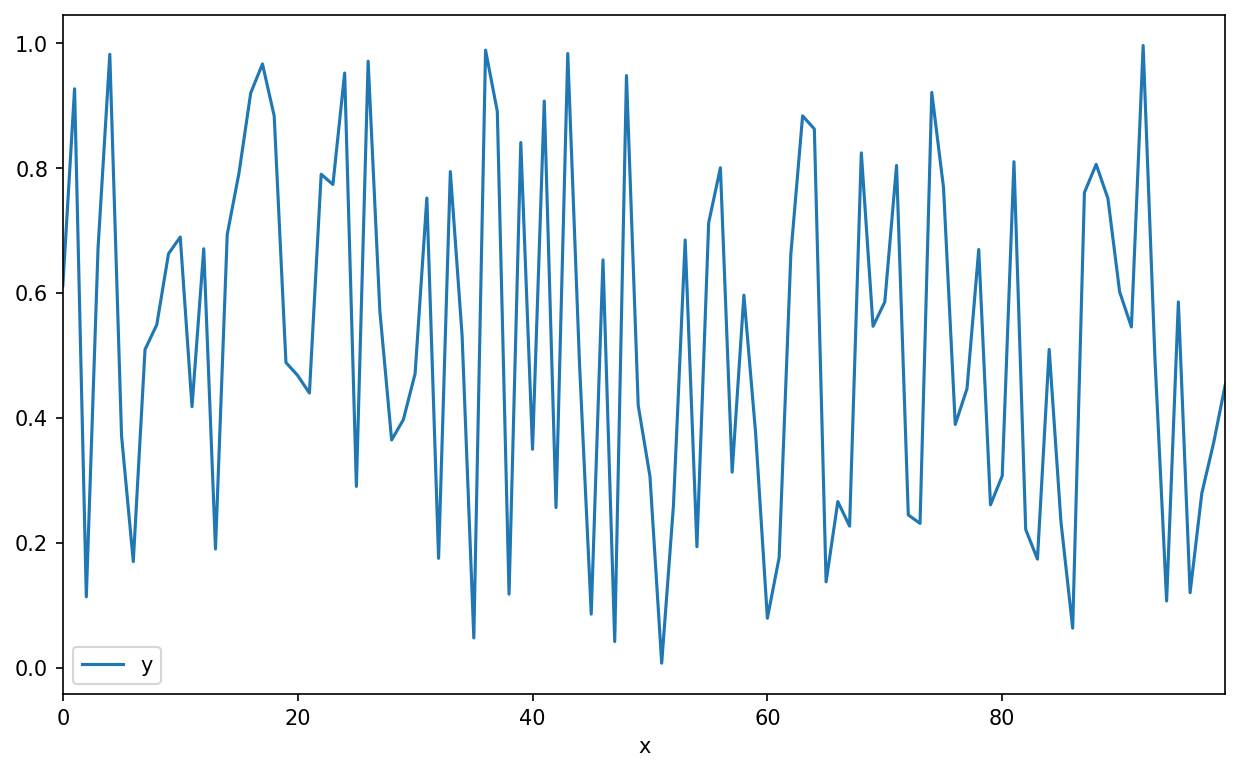

In [56]:
# pandas makes it generally pretty easy to plot things:

xy = pd.DataFrame({"x": np.arange(100), "y": np.random.rand(100)})
xy.plot("x", "y")

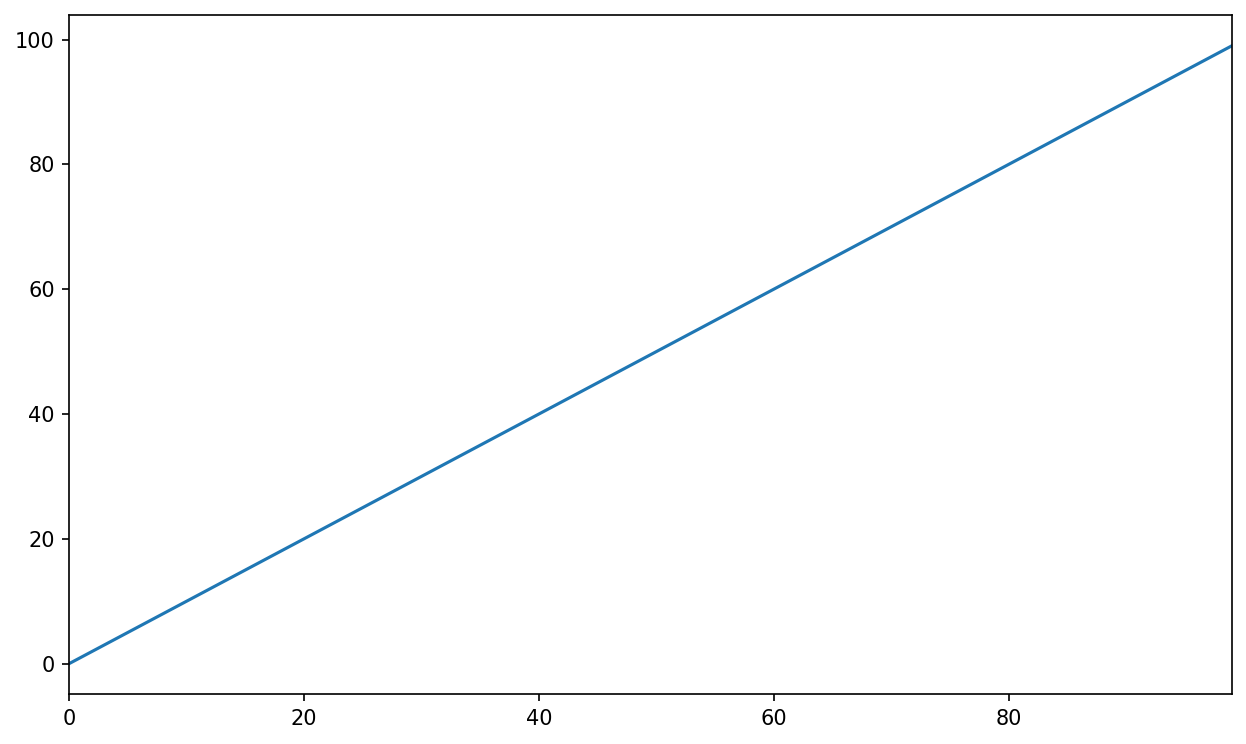

In [58]:
xy.x.plot()

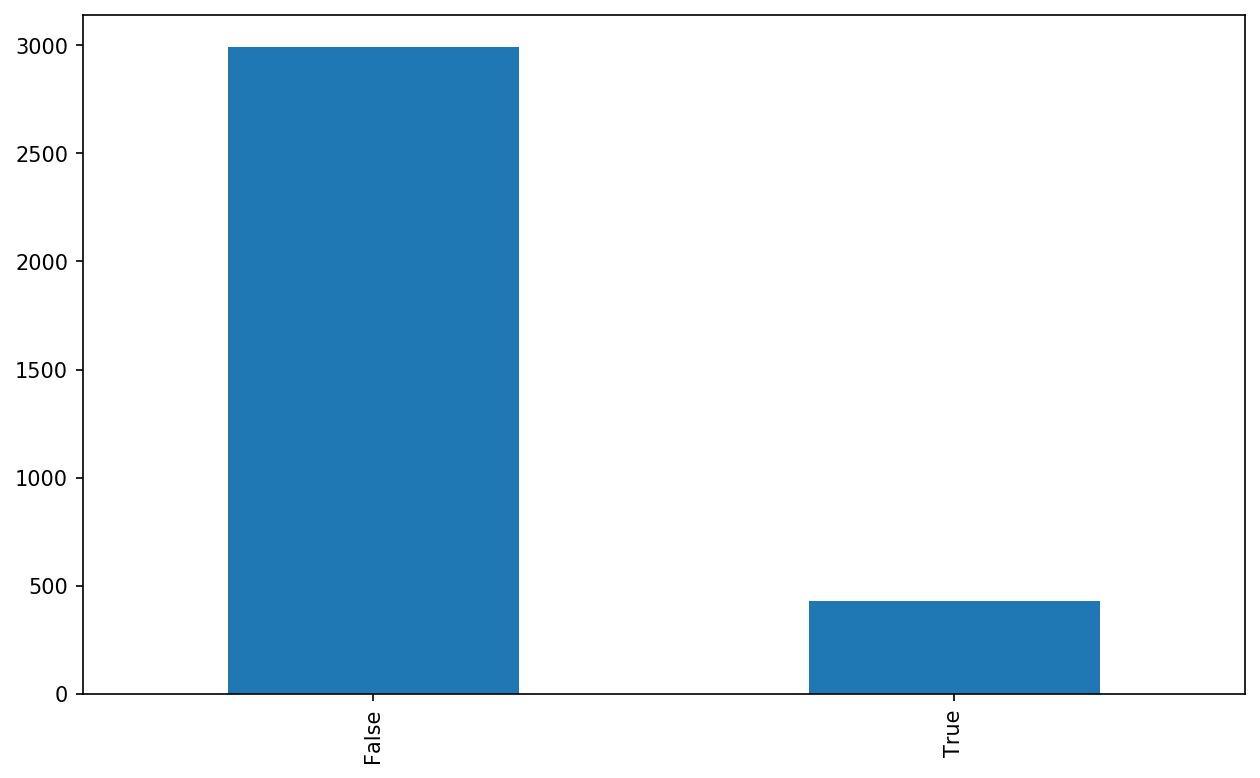

In [79]:
# how many write ins are there??

df.writein.value_counts().plot.bar()

Text(0.5, 1.0, 'Proportion of Write-In Candidates')

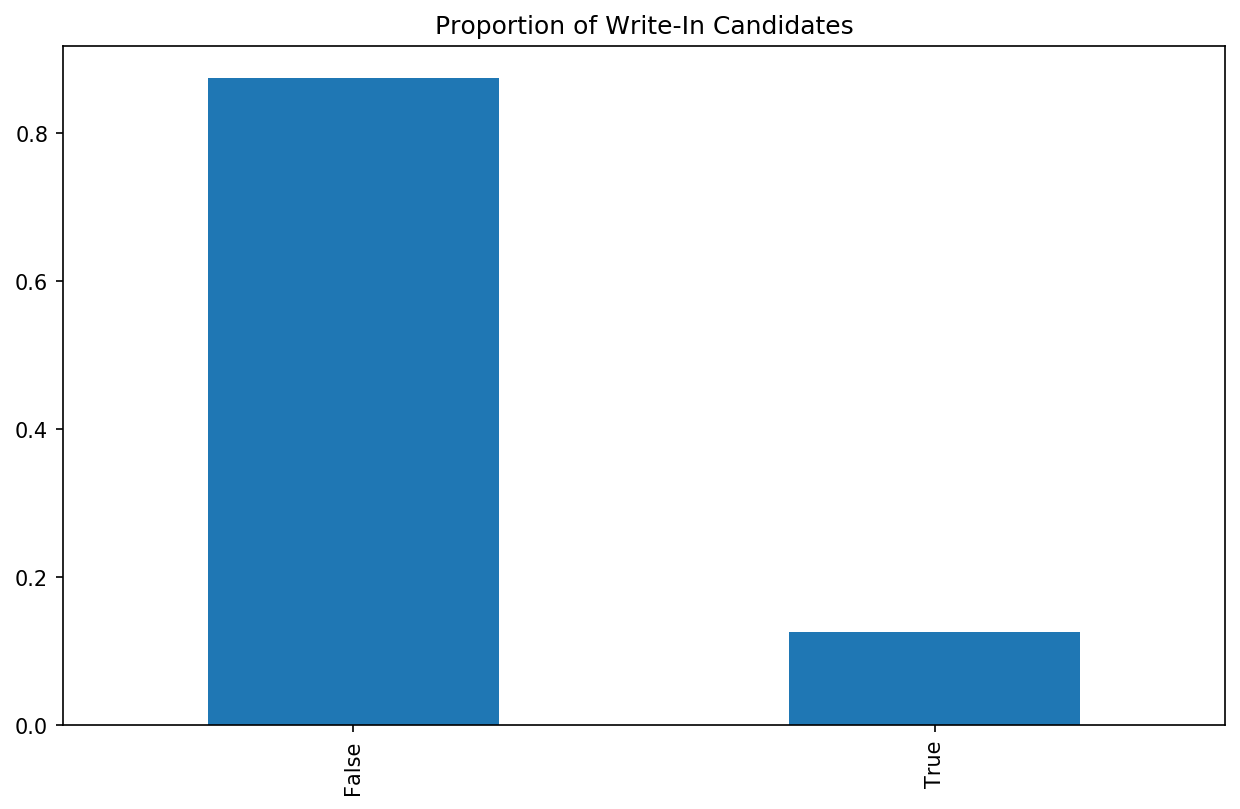

In [31]:
# how many write ins??

df.writein.value_counts(normalize=True).plot.bar()
plt.title("Proportion of Write-In Candidates")

In [54]:
# what about through time?

writeins = df.groupby("year").writein \
                .value_counts(normalize=True) \
                .reset_index("writein", name="ratio")
writeins.head()

,writein,ratio
year,,
1976,False,0.979167
1976,True,0.020833
1978,False,0.928571
1978,True,0.071429
1980,False,0.910448


Text(0.5, 1.0, 'Proportion of US Senate Write-Ins')

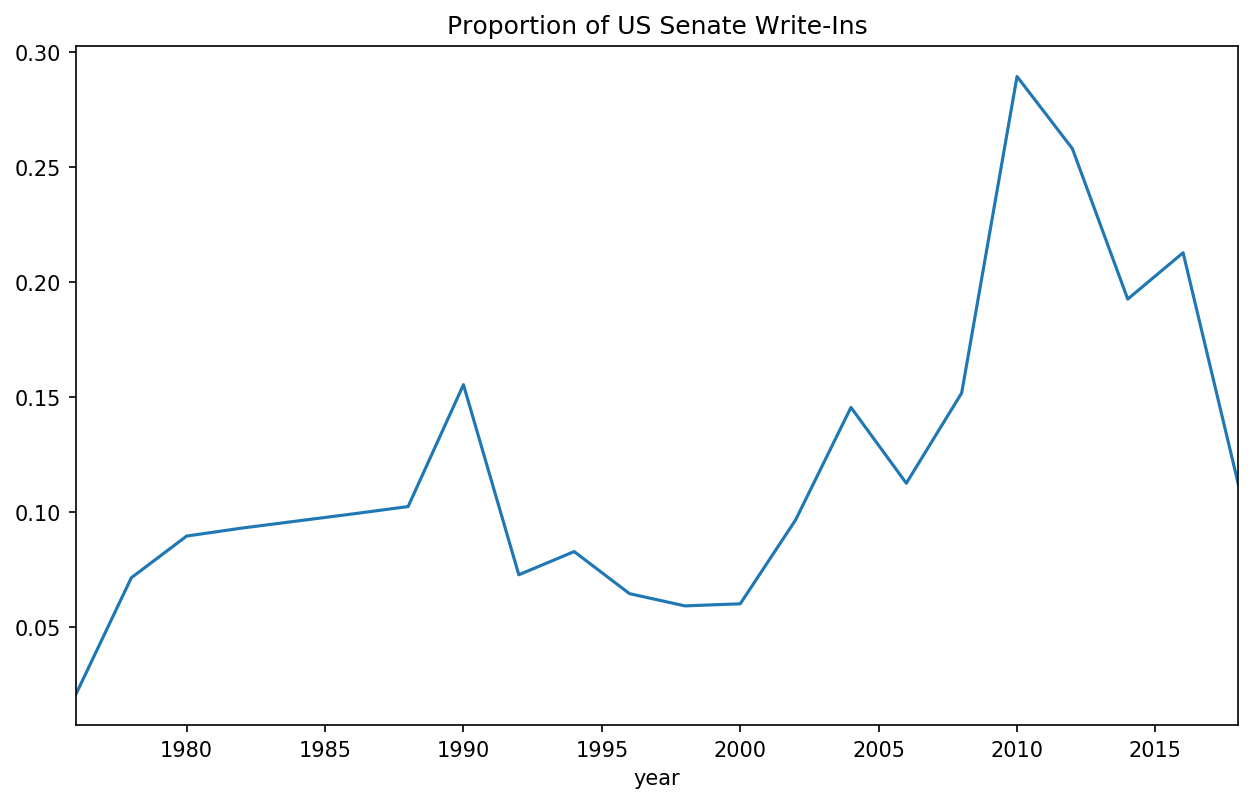

In [63]:
writeins[writeins["writein"] == True].ratio.plot.line()
plt.title("Proportion of US Senate Write-Ins")